## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  58.502111  1153.215572  0.795004  10.091584  1.510415
1  19.196740   824.928770  0.697966   6.765799  1.531628
2  38.386346  1520.396945  0.035014   8.649288  1.033132
3  19.552945  1014.844270  0.635300   5.137314  1.505946
4  11.904411   632.211890  0.787350   9.493684  1.601604


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.18254 | train_mse: 5.88428 | train_mae: 1.80037 |  0:00:00s
epoch 1  | loss: 1.30926 | train_mse: 4.06402 | train_mae: 1.49375 |  0:00:00s
epoch 2  | loss: 1.19319 | train_mse: 3.01475 | train_mae: 1.31967 |  0:00:00s


epoch 3  | loss: 1.27327 | train_mse: 2.55843 | train_mae: 1.25378 |  0:00:00s
epoch 4  | loss: 0.89977 | train_mse: 2.04834 | train_mae: 1.11919 |  0:00:00s
epoch 5  | loss: 1.0134  | train_mse: 1.92855 | train_mae: 1.09583 |  0:00:00s


epoch 6  | loss: 1.09702 | train_mse: 2.08056 | train_mae: 1.08575 |  0:00:00s
epoch 7  | loss: 0.9214  | train_mse: 1.8301  | train_mae: 1.04032 |  0:00:00s
epoch 8  | loss: 0.82483 | train_mse: 1.62839 | train_mae: 0.9816  |  0:00:01s


epoch 9  | loss: 0.89689 | train_mse: 1.46141 | train_mae: 0.92398 |  0:00:01s
epoch 10 | loss: 0.83757 | train_mse: 1.32168 | train_mae: 0.87593 |  0:00:01s


epoch 11 | loss: 0.79275 | train_mse: 1.2479  | train_mae: 0.84522 |  0:00:01s
epoch 12 | loss: 0.81482 | train_mse: 1.16843 | train_mae: 0.81511 |  0:00:01s


epoch 13 | loss: 0.69313 | train_mse: 1.14007 | train_mae: 0.80147 |  0:00:01s
epoch 14 | loss: 0.73657 | train_mse: 1.04986 | train_mae: 0.76956 |  0:00:01s


epoch 15 | loss: 0.64429 | train_mse: 0.99568 | train_mae: 0.7473  |  0:00:01s
epoch 16 | loss: 0.68614 | train_mse: 0.95628 | train_mae: 0.73321 |  0:00:02s


epoch 17 | loss: 0.52514 | train_mse: 0.90665 | train_mae: 0.71273 |  0:00:02s
epoch 18 | loss: 0.55238 | train_mse: 0.86732 | train_mae: 0.69253 |  0:00:02s


epoch 19 | loss: 0.56929 | train_mse: 0.82599 | train_mae: 0.67481 |  0:00:02s
epoch 20 | loss: 0.5372  | train_mse: 0.76073 | train_mae: 0.65235 |  0:00:02s
epoch 21 | loss: 0.57639 | train_mse: 0.72474 | train_mae: 0.63779 |  0:00:02s


epoch 22 | loss: 0.62005 | train_mse: 0.68247 | train_mae: 0.61981 |  0:00:02s
epoch 23 | loss: 0.58526 | train_mse: 0.6668  | train_mae: 0.60777 |  0:00:02s


epoch 24 | loss: 0.42906 | train_mse: 0.68836 | train_mae: 0.60432 |  0:00:02s
epoch 25 | loss: 0.47153 | train_mse: 0.60799 | train_mae: 0.58775 |  0:00:02s


epoch 26 | loss: 0.35307 | train_mse: 0.53171 | train_mae: 0.56862 |  0:00:03s
epoch 27 | loss: 0.38105 | train_mse: 0.49064 | train_mae: 0.55632 |  0:00:03s


epoch 28 | loss: 0.48063 | train_mse: 0.46477 | train_mae: 0.5436  |  0:00:03s
epoch 29 | loss: 0.45728 | train_mse: 0.44862 | train_mae: 0.53318 |  0:00:03s


epoch 30 | loss: 0.38249 | train_mse: 0.43347 | train_mae: 0.52417 |  0:00:03s
epoch 31 | loss: 0.45114 | train_mse: 0.40635 | train_mae: 0.51026 |  0:00:03s
epoch 32 | loss: 0.42516 | train_mse: 0.37744 | train_mae: 0.49209 |  0:00:03s


epoch 33 | loss: 0.54894 | train_mse: 0.35248 | train_mae: 0.47358 |  0:00:03s
epoch 34 | loss: 0.44252 | train_mse: 0.33506 | train_mae: 0.4617  |  0:00:03s
epoch 35 | loss: 0.36    | train_mse: 0.32715 | train_mae: 0.45497 |  0:00:03s


epoch 36 | loss: 0.27264 | train_mse: 0.31791 | train_mae: 0.44803 |  0:00:04s
epoch 37 | loss: 0.46165 | train_mse: 0.31309 | train_mae: 0.4451  |  0:00:04s


epoch 38 | loss: 0.39204 | train_mse: 0.30214 | train_mae: 0.43432 |  0:00:04s
epoch 39 | loss: 0.37782 | train_mse: 0.29511 | train_mae: 0.4305  |  0:00:04s
epoch 40 | loss: 0.28983 | train_mse: 0.29152 | train_mae: 0.42851 |  0:00:04s


epoch 41 | loss: 0.44782 | train_mse: 0.29186 | train_mae: 0.42538 |  0:00:04s
epoch 42 | loss: 0.59786 | train_mse: 0.30024 | train_mae: 0.42441 |  0:00:04s
epoch 43 | loss: 0.41413 | train_mse: 0.28809 | train_mae: 0.4201  |  0:00:04s


epoch 44 | loss: 0.3903  | train_mse: 0.29507 | train_mae: 0.42317 |  0:00:04s
epoch 45 | loss: 0.35161 | train_mse: 0.30786 | train_mae: 0.42722 |  0:00:04s
epoch 46 | loss: 0.48561 | train_mse: 0.31125 | train_mae: 0.42752 |  0:00:05s


epoch 47 | loss: 0.35114 | train_mse: 0.30701 | train_mae: 0.42358 |  0:00:05s
epoch 48 | loss: 0.33256 | train_mse: 0.29053 | train_mae: 0.41218 |  0:00:05s


epoch 49 | loss: 0.35919 | train_mse: 0.28891 | train_mae: 0.41004 |  0:00:05s
epoch 50 | loss: 0.25034 | train_mse: 0.28222 | train_mae: 0.40641 |  0:00:05s
epoch 51 | loss: 0.36681 | train_mse: 0.2797  | train_mae: 0.40401 |  0:00:05s


epoch 52 | loss: 0.2387  | train_mse: 0.27601 | train_mae: 0.40163 |  0:00:05s
epoch 53 | loss: 0.2638  | train_mse: 0.27089 | train_mae: 0.3977  |  0:00:05s
epoch 54 | loss: 0.41216 | train_mse: 0.25383 | train_mae: 0.38777 |  0:00:05s


epoch 55 | loss: 0.38756 | train_mse: 0.22203 | train_mae: 0.36797 |  0:00:05s
epoch 56 | loss: 0.26443 | train_mse: 0.21439 | train_mae: 0.36015 |  0:00:06s
epoch 57 | loss: 0.37037 | train_mse: 0.21585 | train_mae: 0.36036 |  0:00:06s


epoch 58 | loss: 0.23632 | train_mse: 0.21709 | train_mae: 0.35925 |  0:00:06s
epoch 59 | loss: 0.35749 | train_mse: 0.21818 | train_mae: 0.35723 |  0:00:06s


epoch 60 | loss: 0.23285 | train_mse: 0.20891 | train_mae: 0.34784 |  0:00:06s
epoch 61 | loss: 0.33496 | train_mse: 0.19837 | train_mae: 0.33836 |  0:00:06s
epoch 62 | loss: 0.2315  | train_mse: 0.19036 | train_mae: 0.33299 |  0:00:06s


epoch 63 | loss: 0.31436 | train_mse: 0.19439 | train_mae: 0.33768 |  0:00:06s
epoch 64 | loss: 0.28876 | train_mse: 0.20006 | train_mae: 0.34152 |  0:00:06s
epoch 65 | loss: 0.3208  | train_mse: 0.19958 | train_mae: 0.3422  |  0:00:06s


epoch 66 | loss: 0.2377  | train_mse: 0.20375 | train_mae: 0.34459 |  0:00:06s
epoch 67 | loss: 0.23422 | train_mse: 0.20826 | train_mae: 0.34487 |  0:00:07s
epoch 68 | loss: 0.25514 | train_mse: 0.20656 | train_mae: 0.34191 |  0:00:07s


epoch 69 | loss: 0.21984 | train_mse: 0.20507 | train_mae: 0.3421  |  0:00:07s
epoch 70 | loss: 0.1851  | train_mse: 0.20458 | train_mae: 0.34169 |  0:00:07s
epoch 71 | loss: 0.39803 | train_mse: 0.20438 | train_mae: 0.3407  |  0:00:07s


epoch 72 | loss: 0.21312 | train_mse: 0.19733 | train_mae: 0.33502 |  0:00:07s
epoch 73 | loss: 0.3011  | train_mse: 0.19745 | train_mae: 0.3363  |  0:00:07s
epoch 74 | loss: 0.19817 | train_mse: 0.19551 | train_mae: 0.33191 |  0:00:07s


epoch 75 | loss: 0.34531 | train_mse: 0.18964 | train_mae: 0.32782 |  0:00:07s
epoch 76 | loss: 0.24017 | train_mse: 0.18962 | train_mae: 0.33014 |  0:00:07s
epoch 77 | loss: 0.36146 | train_mse: 0.18759 | train_mae: 0.32661 |  0:00:07s


epoch 78 | loss: 0.24604 | train_mse: 0.18432 | train_mae: 0.32621 |  0:00:08s
epoch 79 | loss: 0.26095 | train_mse: 0.17952 | train_mae: 0.3207  |  0:00:08s
epoch 80 | loss: 0.22594 | train_mse: 0.17536 | train_mae: 0.3167  |  0:00:08s


epoch 81 | loss: 0.30145 | train_mse: 0.1697  | train_mae: 0.3112  |  0:00:08s
epoch 82 | loss: 0.27501 | train_mse: 0.16673 | train_mae: 0.31015 |  0:00:08s


epoch 83 | loss: 0.23923 | train_mse: 0.16354 | train_mae: 0.30587 |  0:00:08s
epoch 84 | loss: 0.34258 | train_mse: 0.16163 | train_mae: 0.30347 |  0:00:08s
epoch 85 | loss: 0.2954  | train_mse: 0.16747 | train_mae: 0.30583 |  0:00:08s


epoch 86 | loss: 0.33044 | train_mse: 0.17301 | train_mae: 0.30951 |  0:00:08s
epoch 87 | loss: 0.16534 | train_mse: 0.17332 | train_mae: 0.30936 |  0:00:08s
epoch 88 | loss: 0.24032 | train_mse: 0.16685 | train_mae: 0.30475 |  0:00:08s


epoch 89 | loss: 0.21353 | train_mse: 0.15507 | train_mae: 0.29711 |  0:00:09s
epoch 90 | loss: 0.14366 | train_mse: 0.13533 | train_mae: 0.2831  |  0:00:09s


epoch 91 | loss: 0.32804 | train_mse: 0.13577 | train_mae: 0.28366 |  0:00:09s
epoch 92 | loss: 0.26107 | train_mse: 0.13421 | train_mae: 0.28058 |  0:00:09s
epoch 93 | loss: 0.15206 | train_mse: 0.1495  | train_mae: 0.29711 |  0:00:09s


epoch 94 | loss: 0.23399 | train_mse: 0.1519  | train_mae: 0.29961 |  0:00:09s
epoch 95 | loss: 0.20924 | train_mse: 0.15775 | train_mae: 0.30326 |  0:00:09s
epoch 96 | loss: 0.2259  | train_mse: 0.15973 | train_mae: 0.30386 |  0:00:09s


epoch 97 | loss: 0.29389 | train_mse: 0.16936 | train_mae: 0.30839 |  0:00:09s
epoch 98 | loss: 0.31622 | train_mse: 0.185   | train_mae: 0.31415 |  0:00:09s
epoch 99 | loss: 0.26979 | train_mse: 0.18539 | train_mae: 0.31424 |  0:00:10s


epoch 100| loss: 0.19402 | train_mse: 0.18285 | train_mae: 0.31264 |  0:00:10s
epoch 101| loss: 0.3117  | train_mse: 0.18763 | train_mae: 0.31551 |  0:00:10s


epoch 102| loss: 0.15929 | train_mse: 0.18261 | train_mae: 0.31274 |  0:00:10s
epoch 103| loss: 0.26624 | train_mse: 0.17714 | train_mae: 0.31182 |  0:00:10s
epoch 104| loss: 0.22204 | train_mse: 0.17439 | train_mae: 0.31125 |  0:00:10s


epoch 105| loss: 0.20672 | train_mse: 0.17369 | train_mae: 0.31078 |  0:00:10s
epoch 106| loss: 0.39701 | train_mse: 0.16488 | train_mae: 0.3064  |  0:00:10s
epoch 107| loss: 0.48627 | train_mse: 0.1653  | train_mae: 0.30744 |  0:00:10s


epoch 108| loss: 0.28634 | train_mse: 0.15833 | train_mae: 0.29976 |  0:00:10s
epoch 109| loss: 0.26447 | train_mse: 0.16002 | train_mae: 0.30107 |  0:00:10s
epoch 110| loss: 0.23489 | train_mse: 0.15831 | train_mae: 0.30179 |  0:00:11s


epoch 111| loss: 0.28851 | train_mse: 0.15381 | train_mae: 0.29592 |  0:00:11s
epoch 112| loss: 0.15154 | train_mse: 0.1458  | train_mae: 0.28846 |  0:00:11s
epoch 113| loss: 0.27739 | train_mse: 0.13689 | train_mae: 0.28293 |  0:00:11s


epoch 114| loss: 0.44629 | train_mse: 0.12091 | train_mae: 0.2704  |  0:00:11s
epoch 115| loss: 0.28575 | train_mse: 0.11086 | train_mae: 0.25653 |  0:00:11s
epoch 116| loss: 0.42145 | train_mse: 0.10684 | train_mae: 0.25317 |  0:00:11s


epoch 117| loss: 0.19052 | train_mse: 0.10771 | train_mae: 0.25085 |  0:00:11s
epoch 118| loss: 0.15922 | train_mse: 0.10896 | train_mae: 0.25011 |  0:00:11s
epoch 119| loss: 0.30214 | train_mse: 0.10959 | train_mae: 0.24835 |  0:00:11s


epoch 120| loss: 0.22527 | train_mse: 0.10929 | train_mae: 0.24831 |  0:00:11s
epoch 121| loss: 0.2912  | train_mse: 0.11018 | train_mae: 0.24976 |  0:00:12s
epoch 122| loss: 0.38144 | train_mse: 0.12305 | train_mae: 0.26218 |  0:00:12s


epoch 123| loss: 0.37705 | train_mse: 0.14235 | train_mae: 0.27604 |  0:00:12s
epoch 124| loss: 0.21537 | train_mse: 0.21188 | train_mae: 0.30108 |  0:00:12s
epoch 125| loss: 0.20996 | train_mse: 0.1794  | train_mae: 0.2899  |  0:00:12s


epoch 126| loss: 0.27543 | train_mse: 0.15457 | train_mae: 0.27996 |  0:00:12s
epoch 127| loss: 0.32046 | train_mse: 0.14952 | train_mae: 0.27756 |  0:00:12s
epoch 128| loss: 0.20705 | train_mse: 0.14172 | train_mae: 0.27365 |  0:00:12s


epoch 129| loss: 0.28978 | train_mse: 0.14601 | train_mae: 0.27363 |  0:00:12s
epoch 130| loss: 0.20717 | train_mse: 0.16546 | train_mae: 0.27994 |  0:00:12s
epoch 131| loss: 0.21831 | train_mse: 0.17808 | train_mae: 0.28306 |  0:00:12s


epoch 132| loss: 0.22495 | train_mse: 0.18353 | train_mae: 0.2811  |  0:00:13s
epoch 133| loss: 0.12372 | train_mse: 0.17582 | train_mae: 0.27772 |  0:00:13s
epoch 134| loss: 0.22783 | train_mse: 0.14442 | train_mae: 0.26528 |  0:00:13s


epoch 135| loss: 0.12173 | train_mse: 0.13388 | train_mae: 0.25928 |  0:00:13s
epoch 136| loss: 0.48111 | train_mse: 0.13258 | train_mae: 0.25775 |  0:00:13s
epoch 137| loss: 0.18101 | train_mse: 0.13037 | train_mae: 0.25537 |  0:00:13s


epoch 138| loss: 0.15159 | train_mse: 0.13014 | train_mae: 0.25376 |  0:00:13s
epoch 139| loss: 0.30706 | train_mse: 0.11835 | train_mae: 0.24605 |  0:00:13s
epoch 140| loss: 0.13551 | train_mse: 0.10916 | train_mae: 0.24073 |  0:00:13s


epoch 141| loss: 0.1889  | train_mse: 0.11694 | train_mae: 0.24788 |  0:00:13s
epoch 142| loss: 0.18892 | train_mse: 0.12831 | train_mae: 0.25978 |  0:00:13s
epoch 143| loss: 0.14795 | train_mse: 0.12886 | train_mae: 0.26185 |  0:00:13s


epoch 144| loss: 0.16676 | train_mse: 0.1303  | train_mae: 0.26473 |  0:00:14s
epoch 145| loss: 0.23521 | train_mse: 0.1281  | train_mae: 0.26355 |  0:00:14s
epoch 146| loss: 0.25757 | train_mse: 0.12441 | train_mae: 0.2607  |  0:00:14s


epoch 147| loss: 0.21648 | train_mse: 0.12526 | train_mae: 0.26152 |  0:00:14s
epoch 148| loss: 0.21736 | train_mse: 0.11789 | train_mae: 0.25749 |  0:00:14s
epoch 149| loss: 0.19787 | train_mse: 0.11635 | train_mae: 0.25733 |  0:00:14s


epoch 150| loss: 0.16635 | train_mse: 0.11934 | train_mae: 0.2589  |  0:00:14s
epoch 151| loss: 0.13082 | train_mse: 0.1222  | train_mae: 0.26047 |  0:00:14s
epoch 152| loss: 0.28647 | train_mse: 0.11463 | train_mae: 0.25249 |  0:00:14s


epoch 153| loss: 0.37538 | train_mse: 0.10708 | train_mae: 0.24406 |  0:00:14s
epoch 154| loss: 0.21745 | train_mse: 0.10594 | train_mae: 0.24001 |  0:00:14s
epoch 155| loss: 0.22363 | train_mse: 0.11029 | train_mae: 0.24131 |  0:00:15s


epoch 156| loss: 0.13644 | train_mse: 0.11169 | train_mae: 0.24453 |  0:00:15s
epoch 157| loss: 0.12614 | train_mse: 0.11049 | train_mae: 0.2437  |  0:00:15s
epoch 158| loss: 0.09443 | train_mse: 0.10547 | train_mae: 0.24226 |  0:00:15s


epoch 159| loss: 0.20372 | train_mse: 0.09987 | train_mae: 0.23878 |  0:00:15s
epoch 160| loss: 0.13738 | train_mse: 0.09646 | train_mae: 0.23462 |  0:00:15s
epoch 161| loss: 0.20583 | train_mse: 0.08916 | train_mae: 0.22655 |  0:00:15s


epoch 162| loss: 0.11418 | train_mse: 0.08482 | train_mae: 0.22235 |  0:00:15s
epoch 163| loss: 0.1101  | train_mse: 0.08407 | train_mae: 0.22002 |  0:00:15s
epoch 164| loss: 0.12223 | train_mse: 0.07932 | train_mae: 0.2131  |  0:00:15s


epoch 165| loss: 0.09217 | train_mse: 0.07624 | train_mae: 0.20854 |  0:00:15s
epoch 166| loss: 0.33852 | train_mse: 0.07389 | train_mae: 0.20687 |  0:00:16s
epoch 167| loss: 0.17671 | train_mse: 0.07141 | train_mae: 0.20558 |  0:00:16s


epoch 168| loss: 0.16016 | train_mse: 0.07434 | train_mae: 0.20903 |  0:00:16s
epoch 169| loss: 0.13099 | train_mse: 0.07716 | train_mae: 0.21139 |  0:00:16s
epoch 170| loss: 0.16383 | train_mse: 0.08003 | train_mae: 0.21065 |  0:00:16s


epoch 171| loss: 0.10187 | train_mse: 0.08264 | train_mae: 0.21009 |  0:00:16s
epoch 172| loss: 0.0836  | train_mse: 0.08633 | train_mae: 0.21241 |  0:00:16s
epoch 173| loss: 0.167   | train_mse: 0.08418 | train_mae: 0.21191 |  0:00:16s


epoch 174| loss: 0.15985 | train_mse: 0.09049 | train_mae: 0.21591 |  0:00:16s
epoch 175| loss: 0.14917 | train_mse: 0.09449 | train_mae: 0.21891 |  0:00:16s
epoch 176| loss: 0.10454 | train_mse: 0.09628 | train_mae: 0.21905 |  0:00:16s


epoch 177| loss: 0.36255 | train_mse: 0.09585 | train_mae: 0.21922 |  0:00:17s
epoch 178| loss: 0.15382 | train_mse: 0.09378 | train_mae: 0.21823 |  0:00:17s
epoch 179| loss: 0.10905 | train_mse: 0.0957  | train_mae: 0.21977 |  0:00:17s


epoch 180| loss: 0.30255 | train_mse: 0.097   | train_mae: 0.22155 |  0:00:17s
epoch 181| loss: 0.0954  | train_mse: 0.09681 | train_mae: 0.22074 |  0:00:17s
epoch 182| loss: 0.09836 | train_mse: 0.09415 | train_mae: 0.21818 |  0:00:17s


epoch 183| loss: 0.16501 | train_mse: 0.08859 | train_mae: 0.21304 |  0:00:17s
epoch 184| loss: 0.10963 | train_mse: 0.08474 | train_mae: 0.20916 |  0:00:17s
epoch 185| loss: 0.12352 | train_mse: 0.08166 | train_mae: 0.20616 |  0:00:17s


epoch 186| loss: 0.10069 | train_mse: 0.08179 | train_mae: 0.20582 |  0:00:17s
epoch 187| loss: 0.19122 | train_mse: 0.08466 | train_mae: 0.20741 |  0:00:17s
epoch 188| loss: 0.14623 | train_mse: 0.0858  | train_mae: 0.20849 |  0:00:18s


epoch 189| loss: 0.19329 | train_mse: 0.08323 | train_mae: 0.20947 |  0:00:18s
epoch 190| loss: 0.17849 | train_mse: 0.08126 | train_mae: 0.20861 |  0:00:18s


epoch 191| loss: 0.15083 | train_mse: 0.08206 | train_mae: 0.20984 |  0:00:18s
epoch 192| loss: 0.10625 | train_mse: 0.08269 | train_mae: 0.20858 |  0:00:18s
epoch 193| loss: 0.15715 | train_mse: 0.08352 | train_mae: 0.2079  |  0:00:18s


epoch 194| loss: 0.28565 | train_mse: 0.08635 | train_mae: 0.20915 |  0:00:18s
epoch 195| loss: 0.14293 | train_mse: 0.08221 | train_mae: 0.20581 |  0:00:18s
epoch 196| loss: 0.08734 | train_mse: 0.07958 | train_mae: 0.20381 |  0:00:18s


epoch 197| loss: 0.29803 | train_mse: 0.07363 | train_mae: 0.19965 |  0:00:18s
epoch 198| loss: 0.11359 | train_mse: 0.06869 | train_mae: 0.1959  |  0:00:18s
epoch 199| loss: 0.27706 | train_mse: 0.06539 | train_mae: 0.19386 |  0:00:19s


epoch 200| loss: 0.11618 | train_mse: 0.06387 | train_mae: 0.19193 |  0:00:19s
epoch 201| loss: 0.1587  | train_mse: 0.06324 | train_mae: 0.1906  |  0:00:19s


epoch 202| loss: 0.15258 | train_mse: 0.06199 | train_mae: 0.18898 |  0:00:19s
epoch 203| loss: 0.33718 | train_mse: 0.05932 | train_mae: 0.18547 |  0:00:19s
epoch 204| loss: 0.24077 | train_mse: 0.05785 | train_mae: 0.18287 |  0:00:19s


epoch 205| loss: 0.11926 | train_mse: 0.05699 | train_mae: 0.18196 |  0:00:19s
epoch 206| loss: 0.0939  | train_mse: 0.05578 | train_mae: 0.1818  |  0:00:19s
epoch 207| loss: 0.18404 | train_mse: 0.05518 | train_mae: 0.18116 |  0:00:19s


epoch 208| loss: 0.16955 | train_mse: 0.0553  | train_mae: 0.18311 |  0:00:19s
epoch 209| loss: 0.07553 | train_mse: 0.05228 | train_mae: 0.17881 |  0:00:20s
epoch 210| loss: 0.0855  | train_mse: 0.05237 | train_mae: 0.17759 |  0:00:20s


epoch 211| loss: 0.16996 | train_mse: 0.05333 | train_mae: 0.17934 |  0:00:20s
epoch 212| loss: 0.15752 | train_mse: 0.05345 | train_mae: 0.1787  |  0:00:20s
epoch 213| loss: 0.12124 | train_mse: 0.05173 | train_mae: 0.17382 |  0:00:20s


epoch 214| loss: 0.10815 | train_mse: 0.05216 | train_mae: 0.1734  |  0:00:20s
epoch 215| loss: 0.07466 | train_mse: 0.05164 | train_mae: 0.17355 |  0:00:20s


epoch 216| loss: 0.16457 | train_mse: 0.05129 | train_mae: 0.17276 |  0:00:20s
epoch 217| loss: 0.1353  | train_mse: 0.05207 | train_mae: 0.17281 |  0:00:20s
epoch 218| loss: 0.13404 | train_mse: 0.05368 | train_mae: 0.17631 |  0:00:20s


epoch 219| loss: 0.13381 | train_mse: 0.0532  | train_mae: 0.17518 |  0:00:20s
epoch 220| loss: 0.10354 | train_mse: 0.05468 | train_mae: 0.17673 |  0:00:21s
epoch 221| loss: 0.05961 | train_mse: 0.05487 | train_mae: 0.17639 |  0:00:21s


epoch 222| loss: 0.15012 | train_mse: 0.05457 | train_mae: 0.17368 |  0:00:21s
epoch 223| loss: 0.07899 | train_mse: 0.0535  | train_mae: 0.17237 |  0:00:21s
epoch 224| loss: 0.07806 | train_mse: 0.05342 | train_mae: 0.17288 |  0:00:21s


epoch 225| loss: 0.10859 | train_mse: 0.05327 | train_mae: 0.17389 |  0:00:21s
epoch 226| loss: 0.10964 | train_mse: 0.05222 | train_mae: 0.17237 |  0:00:21s
epoch 227| loss: 0.38812 | train_mse: 0.05427 | train_mae: 0.17543 |  0:00:21s


epoch 228| loss: 0.15894 | train_mse: 0.05445 | train_mae: 0.17669 |  0:00:21s
epoch 229| loss: 0.1205  | train_mse: 0.05709 | train_mae: 0.18174 |  0:00:21s
epoch 230| loss: 0.13728 | train_mse: 0.05919 | train_mae: 0.18487 |  0:00:22s


epoch 231| loss: 0.20982 | train_mse: 0.06099 | train_mae: 0.1868  |  0:00:22s
epoch 232| loss: 0.1091  | train_mse: 0.0613  | train_mae: 0.18574 |  0:00:22s
epoch 233| loss: 0.14579 | train_mse: 0.06142 | train_mae: 0.18467 |  0:00:22s


epoch 234| loss: 0.14761 | train_mse: 0.05873 | train_mae: 0.18128 |  0:00:22s
epoch 235| loss: 0.07529 | train_mse: 0.05731 | train_mae: 0.18112 |  0:00:22s
epoch 236| loss: 0.09447 | train_mse: 0.05667 | train_mae: 0.18111 |  0:00:22s


epoch 237| loss: 0.12097 | train_mse: 0.05723 | train_mae: 0.18092 |  0:00:22s
epoch 238| loss: 0.17337 | train_mse: 0.05849 | train_mae: 0.1822  |  0:00:22s
epoch 239| loss: 0.17587 | train_mse: 0.05729 | train_mae: 0.18103 |  0:00:22s


epoch 240| loss: 0.06891 | train_mse: 0.05766 | train_mae: 0.18045 |  0:00:22s
epoch 241| loss: 0.16066 | train_mse: 0.05895 | train_mae: 0.17958 |  0:00:23s
epoch 242| loss: 0.08068 | train_mse: 0.06108 | train_mae: 0.18117 |  0:00:23s


epoch 243| loss: 0.11603 | train_mse: 0.06091 | train_mae: 0.18202 |  0:00:23s
epoch 244| loss: 0.14531 | train_mse: 0.05982 | train_mae: 0.18009 |  0:00:23s
epoch 245| loss: 0.18799 | train_mse: 0.06039 | train_mae: 0.18008 |  0:00:23s


epoch 246| loss: 0.23233 | train_mse: 0.0603  | train_mae: 0.18036 |  0:00:23s
epoch 247| loss: 0.24929 | train_mse: 0.05959 | train_mae: 0.17943 |  0:00:23s


epoch 248| loss: 0.09177 | train_mse: 0.05748 | train_mae: 0.17677 |  0:00:23s
epoch 249| loss: 0.18032 | train_mse: 0.05535 | train_mae: 0.17436 |  0:00:23s
epoch 250| loss: 0.15862 | train_mse: 0.05368 | train_mae: 0.1716  |  0:00:23s


epoch 251| loss: 0.10448 | train_mse: 0.05369 | train_mae: 0.17057 |  0:00:23s
epoch 252| loss: 0.07662 | train_mse: 0.05383 | train_mae: 0.17063 |  0:00:24s
epoch 253| loss: 0.08089 | train_mse: 0.05367 | train_mae: 0.16823 |  0:00:24s


epoch 254| loss: 0.09248 | train_mse: 0.05291 | train_mae: 0.16818 |  0:00:24s
epoch 255| loss: 0.09222 | train_mse: 0.05182 | train_mae: 0.17055 |  0:00:24s
epoch 256| loss: 0.13539 | train_mse: 0.05075 | train_mae: 0.17049 |  0:00:24s


epoch 257| loss: 0.14141 | train_mse: 0.0513  | train_mae: 0.17127 |  0:00:24s
epoch 258| loss: 0.06957 | train_mse: 0.04949 | train_mae: 0.16672 |  0:00:24s
epoch 259| loss: 0.15015 | train_mse: 0.05009 | train_mae: 0.16809 |  0:00:24s


epoch 260| loss: 0.20404 | train_mse: 0.05155 | train_mae: 0.16913 |  0:00:24s
epoch 261| loss: 0.12934 | train_mse: 0.05013 | train_mae: 0.16643 |  0:00:24s
epoch 262| loss: 0.0917  | train_mse: 0.05199 | train_mae: 0.16774 |  0:00:25s


epoch 263| loss: 0.11446 | train_mse: 0.05264 | train_mae: 0.16849 |  0:00:25s
epoch 264| loss: 0.07451 | train_mse: 0.05307 | train_mae: 0.17048 |  0:00:25s


epoch 265| loss: 0.13698 | train_mse: 0.05164 | train_mae: 0.17043 |  0:00:25s
epoch 266| loss: 0.1341  | train_mse: 0.0501  | train_mae: 0.16826 |  0:00:25s
epoch 267| loss: 0.0968  | train_mse: 0.05    | train_mae: 0.16947 |  0:00:25s


epoch 268| loss: 0.17881 | train_mse: 0.0501  | train_mae: 0.1702  |  0:00:25s
epoch 269| loss: 0.09866 | train_mse: 0.05021 | train_mae: 0.16835 |  0:00:25s
epoch 270| loss: 0.11132 | train_mse: 0.05045 | train_mae: 0.16906 |  0:00:25s


epoch 271| loss: 0.11388 | train_mse: 0.051   | train_mae: 0.17062 |  0:00:25s
epoch 272| loss: 0.09949 | train_mse: 0.05054 | train_mae: 0.17137 |  0:00:25s
epoch 273| loss: 0.23138 | train_mse: 0.04934 | train_mae: 0.16924 |  0:00:26s


epoch 274| loss: 0.07959 | train_mse: 0.04973 | train_mae: 0.16663 |  0:00:26s
epoch 275| loss: 0.11591 | train_mse: 0.05083 | train_mae: 0.16495 |  0:00:26s
epoch 276| loss: 0.12699 | train_mse: 0.05417 | train_mae: 0.16807 |  0:00:26s


epoch 277| loss: 0.096   | train_mse: 0.05809 | train_mae: 0.17263 |  0:00:26s
epoch 278| loss: 0.08056 | train_mse: 0.06302 | train_mae: 0.17828 |  0:00:26s
epoch 279| loss: 0.16106 | train_mse: 0.06581 | train_mae: 0.18085 |  0:00:26s


epoch 280| loss: 0.079   | train_mse: 0.06962 | train_mae: 0.18408 |  0:00:26s
epoch 281| loss: 0.10971 | train_mse: 0.07269 | train_mae: 0.18717 |  0:00:26s
epoch 282| loss: 0.11638 | train_mse: 0.07192 | train_mae: 0.18707 |  0:00:26s


epoch 283| loss: 0.2164  | train_mse: 0.07092 | train_mae: 0.18423 |  0:00:27s
epoch 284| loss: 0.10354 | train_mse: 0.06952 | train_mae: 0.18256 |  0:00:27s


epoch 285| loss: 0.19119 | train_mse: 0.06404 | train_mae: 0.17882 |  0:00:27s
epoch 286| loss: 0.08143 | train_mse: 0.05817 | train_mae: 0.17217 |  0:00:27s
epoch 287| loss: 0.13875 | train_mse: 0.05371 | train_mae: 0.16818 |  0:00:27s


epoch 288| loss: 0.11861 | train_mse: 0.05344 | train_mae: 0.16739 |  0:00:27s
epoch 289| loss: 0.1383  | train_mse: 0.05469 | train_mae: 0.16868 |  0:00:27s
epoch 290| loss: 0.06379 | train_mse: 0.05629 | train_mae: 0.17073 |  0:00:27s


epoch 291| loss: 0.11499 | train_mse: 0.05503 | train_mae: 0.16826 |  0:00:27s
epoch 292| loss: 0.11098 | train_mse: 0.05686 | train_mae: 0.1692  |  0:00:27s
epoch 293| loss: 0.15903 | train_mse: 0.06032 | train_mae: 0.17146 |  0:00:28s


epoch 294| loss: 0.0892  | train_mse: 0.06421 | train_mae: 0.17331 |  0:00:28s
epoch 295| loss: 0.14033 | train_mse: 0.06543 | train_mae: 0.17536 |  0:00:28s
epoch 296| loss: 0.08318 | train_mse: 0.06711 | train_mae: 0.17947 |  0:00:28s


epoch 297| loss: 0.10493 | train_mse: 0.06983 | train_mae: 0.18226 |  0:00:28s
epoch 298| loss: 0.08112 | train_mse: 0.07097 | train_mae: 0.18178 |  0:00:28s
epoch 299| loss: 0.11492 | train_mse: 0.06678 | train_mae: 0.17589 |  0:00:28s


epoch 300| loss: 0.10223 | train_mse: 0.06001 | train_mae: 0.17061 |  0:00:28s
epoch 301| loss: 0.14037 | train_mse: 0.05086 | train_mae: 0.16117 |  0:00:28s
epoch 302| loss: 0.11578 | train_mse: 0.04947 | train_mae: 0.15975 |  0:00:28s


epoch 303| loss: 0.20273 | train_mse: 0.04709 | train_mae: 0.15656 |  0:00:28s
epoch 304| loss: 0.09352 | train_mse: 0.04708 | train_mae: 0.15735 |  0:00:29s
epoch 305| loss: 0.14735 | train_mse: 0.0459  | train_mae: 0.1575  |  0:00:29s


epoch 306| loss: 0.08367 | train_mse: 0.04459 | train_mae: 0.15632 |  0:00:29s
epoch 307| loss: 0.10015 | train_mse: 0.04358 | train_mae: 0.15416 |  0:00:29s


epoch 308| loss: 0.21981 | train_mse: 0.04362 | train_mae: 0.15258 |  0:00:29s
epoch 309| loss: 0.08787 | train_mse: 0.04537 | train_mae: 0.15321 |  0:00:29s


epoch 310| loss: 0.28573 | train_mse: 0.04418 | train_mae: 0.15113 |  0:00:29s


epoch 311| loss: 0.07936 | train_mse: 0.04488 | train_mae: 0.15218 |  0:00:30s
epoch 312| loss: 0.17494 | train_mse: 0.04464 | train_mae: 0.15324 |  0:00:30s


epoch 313| loss: 0.07911 | train_mse: 0.04539 | train_mae: 0.15534 |  0:00:30s
epoch 314| loss: 0.12369 | train_mse: 0.04611 | train_mae: 0.15724 |  0:00:30s


epoch 315| loss: 0.06709 | train_mse: 0.04733 | train_mae: 0.15791 |  0:00:30s
epoch 316| loss: 0.12397 | train_mse: 0.04857 | train_mae: 0.15799 |  0:00:30s
epoch 317| loss: 0.26676 | train_mse: 0.04761 | train_mae: 0.15573 |  0:00:30s


epoch 318| loss: 0.09021 | train_mse: 0.04762 | train_mae: 0.15563 |  0:00:30s
epoch 319| loss: 0.08643 | train_mse: 0.04674 | train_mae: 0.15266 |  0:00:31s
epoch 320| loss: 0.10795 | train_mse: 0.04599 | train_mae: 0.15209 |  0:00:31s


epoch 321| loss: 0.14385 | train_mse: 0.04611 | train_mae: 0.15295 |  0:00:31s
epoch 322| loss: 0.09682 | train_mse: 0.05068 | train_mae: 0.15777 |  0:00:31s
epoch 323| loss: 0.0929  | train_mse: 0.05145 | train_mae: 0.15837 |  0:00:31s


epoch 324| loss: 0.20355 | train_mse: 0.04888 | train_mae: 0.15518 |  0:00:31s
epoch 325| loss: 0.17139 | train_mse: 0.04456 | train_mae: 0.15033 |  0:00:31s
epoch 326| loss: 0.1514  | train_mse: 0.04643 | train_mae: 0.15264 |  0:00:31s


epoch 327| loss: 0.17307 | train_mse: 0.0496  | train_mae: 0.15516 |  0:00:31s
epoch 328| loss: 0.09498 | train_mse: 0.05312 | train_mae: 0.15993 |  0:00:31s
epoch 329| loss: 0.11322 | train_mse: 0.05908 | train_mae: 0.16505 |  0:00:31s


epoch 330| loss: 0.09358 | train_mse: 0.05857 | train_mae: 0.16451 |  0:00:32s
epoch 331| loss: 0.07099 | train_mse: 0.0552  | train_mae: 0.16228 |  0:00:32s


epoch 332| loss: 0.08023 | train_mse: 0.05389 | train_mae: 0.16271 |  0:00:32s
epoch 333| loss: 0.08688 | train_mse: 0.05149 | train_mae: 0.16055 |  0:00:32s
epoch 334| loss: 0.27444 | train_mse: 0.0506  | train_mae: 0.16094 |  0:00:32s


epoch 335| loss: 0.12012 | train_mse: 0.05061 | train_mae: 0.16139 |  0:00:32s
epoch 336| loss: 0.13096 | train_mse: 0.05208 | train_mae: 0.1624  |  0:00:32s


epoch 337| loss: 0.09694 | train_mse: 0.05503 | train_mae: 0.16503 |  0:00:33s
epoch 338| loss: 0.05819 | train_mse: 0.05689 | train_mae: 0.16706 |  0:00:33s


epoch 339| loss: 0.08902 | train_mse: 0.06185 | train_mae: 0.17175 |  0:00:33s
epoch 340| loss: 0.16771 | train_mse: 0.05984 | train_mae: 0.171   |  0:00:33s


epoch 341| loss: 0.16229 | train_mse: 0.06164 | train_mae: 0.17438 |  0:00:33s
epoch 342| loss: 0.13275 | train_mse: 0.06209 | train_mae: 0.17624 |  0:00:33s
epoch 343| loss: 0.17519 | train_mse: 0.06305 | train_mae: 0.17848 |  0:00:33s


epoch 344| loss: 0.1036  | train_mse: 0.06236 | train_mae: 0.17939 |  0:00:33s
epoch 345| loss: 0.14548 | train_mse: 0.06112 | train_mae: 0.17865 |  0:00:33s
epoch 346| loss: 0.06992 | train_mse: 0.05793 | train_mae: 0.17627 |  0:00:33s


epoch 347| loss: 0.13458 | train_mse: 0.05596 | train_mae: 0.17539 |  0:00:34s
epoch 348| loss: 0.18545 | train_mse: 0.05354 | train_mae: 0.17358 |  0:00:34s


epoch 349| loss: 0.10715 | train_mse: 0.05365 | train_mae: 0.17258 |  0:00:34s
epoch 350| loss: 0.07742 | train_mse: 0.05218 | train_mae: 0.16925 |  0:00:34s
epoch 351| loss: 0.08455 | train_mse: 0.05095 | train_mae: 0.16722 |  0:00:34s


epoch 352| loss: 0.19965 | train_mse: 0.04783 | train_mae: 0.16393 |  0:00:34s
epoch 353| loss: 0.15298 | train_mse: 0.04507 | train_mae: 0.16108 |  0:00:34s
epoch 354| loss: 0.08227 | train_mse: 0.04415 | train_mae: 0.16086 |  0:00:34s


epoch 355| loss: 0.05532 | train_mse: 0.04301 | train_mae: 0.16041 |  0:00:34s
epoch 356| loss: 0.08737 | train_mse: 0.04224 | train_mae: 0.15871 |  0:00:34s


epoch 357| loss: 0.13018 | train_mse: 0.04146 | train_mae: 0.15419 |  0:00:35s
epoch 358| loss: 0.08768 | train_mse: 0.04201 | train_mae: 0.15373 |  0:00:35s
epoch 359| loss: 0.15787 | train_mse: 0.04476 | train_mae: 0.15746 |  0:00:35s


epoch 360| loss: 0.18635 | train_mse: 0.04846 | train_mae: 0.16048 |  0:00:35s


epoch 361| loss: 0.238   | train_mse: 0.05284 | train_mae: 0.16536 |  0:00:35s
epoch 362| loss: 0.07097 | train_mse: 0.05643 | train_mae: 0.17086 |  0:00:35s
epoch 363| loss: 0.11257 | train_mse: 0.06067 | train_mae: 0.17628 |  0:00:35s


epoch 364| loss: 0.06673 | train_mse: 0.06433 | train_mae: 0.18102 |  0:00:35s
epoch 365| loss: 0.12083 | train_mse: 0.06299 | train_mae: 0.18009 |  0:00:35s
epoch 366| loss: 0.08134 | train_mse: 0.06677 | train_mae: 0.18166 |  0:00:35s


epoch 367| loss: 0.16114 | train_mse: 0.06691 | train_mae: 0.18133 |  0:00:36s
epoch 368| loss: 0.21141 | train_mse: 0.06707 | train_mae: 0.18293 |  0:00:36s
epoch 369| loss: 0.11021 | train_mse: 0.06463 | train_mae: 0.182   |  0:00:36s


epoch 370| loss: 0.08544 | train_mse: 0.05958 | train_mae: 0.17888 |  0:00:36s
epoch 371| loss: 0.07316 | train_mse: 0.05533 | train_mae: 0.17403 |  0:00:36s


epoch 372| loss: 0.07362 | train_mse: 0.05358 | train_mae: 0.17112 |  0:00:36s
epoch 373| loss: 0.10937 | train_mse: 0.05405 | train_mae: 0.16888 |  0:00:36s
epoch 374| loss: 0.10913 | train_mse: 0.05822 | train_mae: 0.17317 |  0:00:36s

epoch 375| loss: 0.10261 | train_mse: 0.05871 | train_mae: 0.17374 |  0:00:37s

Early stopping occurred at epoch 375 with best_epoch = 325 and best_train_mae = 0.15033
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5280010612010819


ABC Pre-generator MAE 0.5292657896436939


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

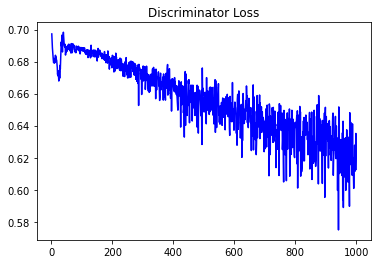

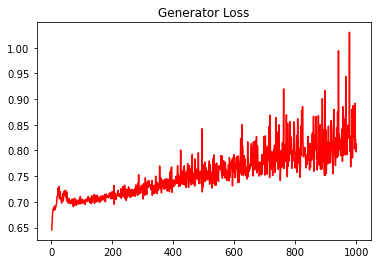

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5036289090439677


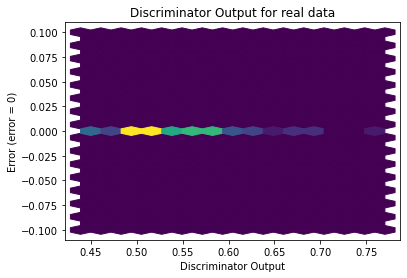

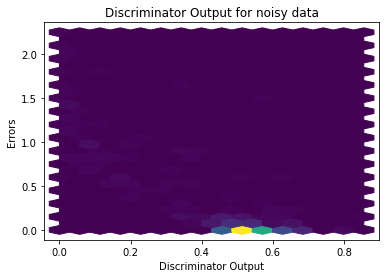

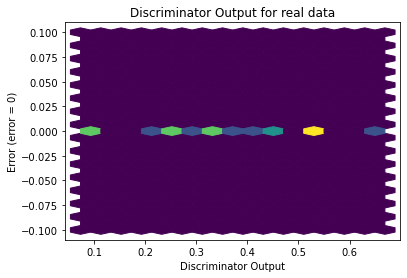

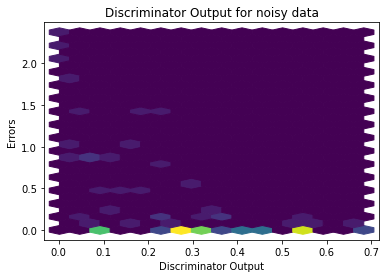

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


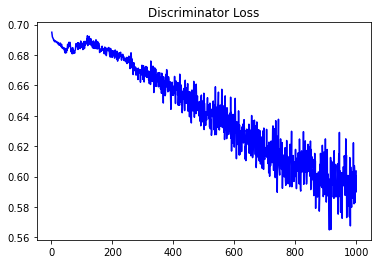

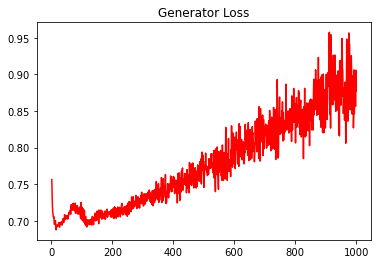

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.49094855070859195


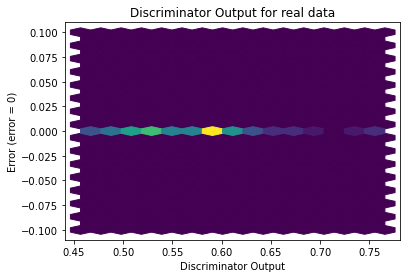

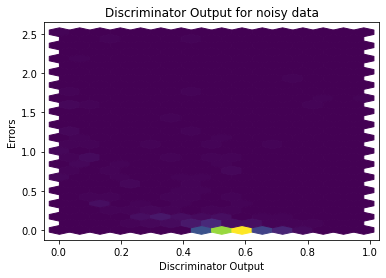

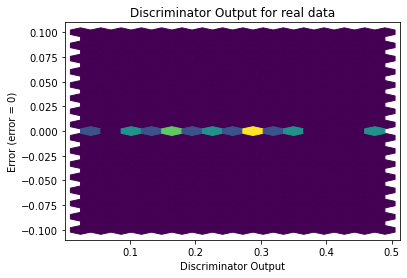

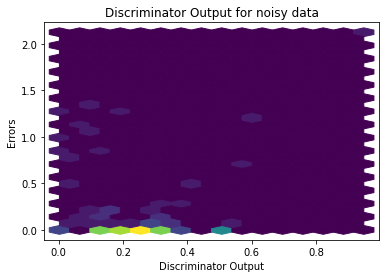

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1254]], requires_grad=True)
